In [2]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
sns.set()

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os.path
import scipy as sp
import scipy.stats
import statsmodels as smr
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf
scipy.stats.chisqprob = lambda chisq, df: scipy.stats.chi2.sf(chisq, df)

/Users/charles/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
class Project:   
    def __init__(self):
        self.data = None
        self.train_data = None
        self.test_data = None
            
    def _load_data_(self,filepath):
      
        #if (~os.path.isfile('train.csv')) | (~os.path.isfile('test.csv')):
           # self.data = pd.read_csv(filepath,encoding='ISO-8859-1')
           # self.train_test_split()
           # self._write_data_()
            
        self.train_data = pd.read_csv('train.csv')
                                #,encoding='ISO-8859-1')
        self.test_data = pd.read_csv('test.csv',encoding='ISO-8859-1')
        return self.train_data
        
    def _write_data_(self):
        self.train_data.to_csv('train.csv')
        self.test_data.to_csv('test.csv')
    
    def train_test_split(self):
        self.train_data, self.test_data = train_test_split(self.data, test_size=0.2, random_state=42)   
        
    def null_summary(self,df):
        print(df.isnull().sum())
        all_data_na = (df.isnull().sum() / len(df)) * 100
        all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
        missing_data.head()
        if missing_data.size> 0:
            f, ax = plt.subplots(figsize=(15, 12))
            plt.xticks(rotation='90')
            sns.barplot(x=all_data_na.index, y=all_data_na)
            plt.xlabel('Features', fontsize=15)
            plt.ylabel('Percent of missing values', fontsize=15)
            plt.title('Percent missing data by feature', fontsize=15)
            plt.show()
            
    def get_stats(self,df,variable):
        print("Skewness: %f" % df[variable].skew())
        print("Kurtosis: %f" % df[variable].kurt())
        print("Mean: %f" % df[variable].mean())
        print("Variance: %f" % (df[variable].var()))

            
    def correlation_map(self,df,outcome,k):
        corrmat = df.corr()
        col_large = corrmat.nlargest(k+1,outcome)[outcome].index
        col_small = corrmat.nsmallest(k,outcome)[outcome].index
        cols = col_large.union(col_small)
        cm = np.corrcoef(corrmat[cols].loc[cols].values.T)
        print(corrmat[cols].loc[outcome])
        #sns.set(font_scale=1.25)
        hm = sns.heatmap(cm, cbar=True, vmax=1,annot=True, fmt='.1f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
        return cols
    
    def encode_organization(self,x):
            if 'Academy' in x:
                return 1
            elif 'Instituion' in x:
                return 2
            elif 'College' in x:
                return 3
            elif 'University' in x:
                return 4
            else:
                return 0
    
    def encode_cost(self,df):
        prices = []
        for i in range(len(df)):
            if pd.notnull(df['NPT4_PUB'][i]):
                prices.append(df['NPT4_PUB'][i])
            elif pd.notnull(df['NPT4_PRIV'][i]):
                prices.append(df['NPT4_PRIV'][i])
            else:
                prices.append(np.NaN) 
        
        df.loc[:,'NET_COST'] = pd.Series(prices, index=df.index)
        
        return df
    
    def encode_25KBinary(self, df):
        vals = []
        for i in range(len(df)):
            if float(df['gt_25k_p6'][i]) >= 0.6:
                vals.append(1)
            elif float(df['gt_25k_p6'][i]) < 0.6:
                vals.append(0)
            else:
                vals.append(np.NaN)
        
        df.loc[:,'Binary_25k'] = pd.Series(vals, index=df.index)
        
        return df
    
    def encode_state(self,x):
        west = ['WA','MT','OR','ID','WT','CA','NV','UT','CO','AZ','NM']
        midwest = ['ND','MN','SD','NE','KS','IA','MO','WI','IL','MI','IN','OH','WY']
        northeast = ['NY','PA','NJ','RI','CT','MA','VT','NH','ME']
        south = ['TX','OK','AR','LA','MS','AL','GA','TN','KY','WV','DC','MD','VA','DE','NC','SC','FL']
        others =['AK','HI','PR','PW','AS','GU','FM','VI']
        
        if x in others:
            return 0
        elif x in midwest:
            return 1
        elif x in south:
            return 2
        elif x in west:
            return 3
        elif x in northeast:
            return 4
        else: return x
        
    def compute_ci(self,x):
        print('tn,p,dof =',sms.DescrStatsW(x).ttest_mean(x.mean()))
        print('CI =',sms.DescrStatsW(x).tconfint_mean())
        

In [5]:
project = Project()
project._load_data_('train.csv')

,Unnamed: 0,INSTNM,CITY,STABBR,PREDDEG,CONTROL,LOCALE,SATVRMID,SATMTMID,SATWRMID,...,RET_PTL4,PCTFLOAN,UG25abv,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,md_earn_wne_p10,gt_25k_p6
0,7440,Marian Health Careers Center-Van Nuys Campus,Van Nuys,CA,1,3,11.0,NaN,NaN,NaN,...,NaN,0.6786,0.5745,15680,174.080144,0.847161572,NaN,0.27471978,47500,0.767567575
1,5144,Emma's Beauty Academy-Juana Diaz,Juana Diaz,PR,1,3,23.0,NaN,NaN,NaN,...,NaN,0.0000,0.1733,NaN,NaN,PrivacySuppressed,NaN,0.703098375,13400,0.181818187
2,7169,Milan Institute-Nampa,Nampa,ID,1,3,22.0,NaN,NaN,NaN,...,NaN,0.4332,0.4314,9500,105.469475,0.351691581,NaN,NaN,16100,0.249343827
3,5160,University of Phoenix-Bay Area Campus,San Jose,CA,3,3,11.0,NaN,NaN,NaN,...,NaN,0.6299,0.8464,35500,394.122775,0.406534043,0.135344954,NaN,53400,0.705231071
4,4987,Sanford-Brown Institute-Tampa,Tampa,FL,1,3,21.0,NaN,NaN,NaN,...,NaN,0.6094,0.4858,9500,105.469475,0.409117821,NaN,0.596397059,28300,0.524061024
5,2415,Truckee Meadows Community College,Reno,NV,2,1,12.0,NaN,NaN,NaN,...,0.4680,0.1438,0.3980,10000,111.0205,0.551597052,NaN,0.203587983,32500,0.543252587
6,6076,Healing Arts Institute,Perrysburg,OH,1,3,21.0,NaN,NaN,NaN,...,NaN,0.6197,0.6250,7917,87.89492985,0.755102041,NaN,NaN,NaN,PrivacySuppressed
7,1790,Maryland University of Integrative Health,Laurel,MD,4,2,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,NaN
8,7170,Milan Institute of Cosmetology-El Paso,El Paso,TX,1,3,11.0,NaN,NaN,NaN,...,NaN,0.4466,0.4847,14252,158.2264166,0.291276491,NaN,NaN,18900,0.228511527
9,3857,Middle Tennessee State University,Murfreesboro,TN,3,1,12.0,515.0,510.0,NaN,...,NaN,0.5732,0.2315,22170.5,246.1379995,0.739414441,0.453413673,NaN,36100,0.592180908


In [6]:
df = project.train_data
df = df.drop(df.columns[0],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6243 entries, 0 to 6242
Data columns (total 42 columns):
INSTNM                    6243 non-null object
CITY                      6243 non-null object
STABBR                    6243 non-null object
PREDDEG                   6243 non-null int64
CONTROL                   6243 non-null int64
LOCALE                    5911 non-null float64
SATVRMID                  1036 non-null float64
SATMTMID                  1048 non-null float64
SATWRMID                  631 non-null float64
ACTCMMID                  1076 non-null float64
ACTENMID                  939 non-null float64
ACTMTMID                  940 non-null float64
ACTWRMID                  247 non-null float64
SAT_AVG                   1136 non-null float64
DISTANCEONLY              5913 non-null float64
UGDS                      5680 non-null float64
UGDS_WHITE                5680 non-null float64
UGDS_BLACK                5680 non-null float64
UGDS_HISP                 5680 non-null 

In [7]:
df.shape

(6243, 42)

In [8]:
df = df.apply(lambda x: x.replace('PrivacySuppressed',np.NAN))
df = project.encode_cost(df)
df = project.encode_25KBinary(df)

In [9]:
df['RPY_3YR_RT_SUPP'] = pd.to_numeric(df['RPY_3YR_RT_SUPP'])
df['md_earn_wne_p10'] = pd.to_numeric(df['md_earn_wne_p10'])
df['GRAD_DEBT_MDN_SUPP'] = pd.to_numeric(df['GRAD_DEBT_MDN_SUPP'])
df['GRAD_DEBT_MDN10YR_SUPP'] = pd.to_numeric(df['GRAD_DEBT_MDN10YR_SUPP'])
df['C150_4_POOLED_SUPP'] = pd.to_numeric(df['C150_4_POOLED_SUPP'])
df['C200_L4_POOLED_SUPP'] = pd.to_numeric(df['C200_L4_POOLED_SUPP'])

In [10]:
columns = df.columns
#drop outcomes variables and "name" variables 
treatment_variables = columns.drop(['INSTNM','CITY','STABBR','RPY_3YR_RT_SUPP', 'md_earn_wne_p10', 'gt_25k_p6', 'Binary_25k'])

In [11]:
#only keep the variables if less than 20% of the values are missing ( SHOULD I KEEP IT at 20%?)
keep_variables = []
for i in range(len(treatment_variables)):
    x = df[str(treatment_variables[i])].isnull().sum()/float((len(df)))
    if x <= 0.2:
        keep_variables.append(treatment_variables[i]) 

In [12]:
keep_variables

['PREDDEG',
 'CONTROL',
 'LOCALE',
 'DISTANCEONLY',
 'UGDS',
 'UGDS_WHITE',
 'UGDS_BLACK',
 'UGDS_HISP',
 'UGDS_ASIAN',
 'UGDS_AIAN',
 'UGDS_NHPI',
 'UGDS_2MOR',
 'UGDS_NRA',
 'UGDS_UNKN',
 'PPTUG_EF',
 'PCTPELL',
 'PCTFLOAN',
 'UG25abv',
 'GRAD_DEBT_MDN_SUPP',
 'GRAD_DEBT_MDN10YR_SUPP',
 'NET_COST']

In [15]:
#correlations for RPY_3YR_RT_SUPP
for i in range(len(keep_variables)):
    print(str(keep_variables[i]))
    print(df['RPY_3YR_RT_SUPP'].corr(df[str(keep_variables[i])]))

PREDDEG
0.474812168461
CONTROL
-0.435251442859
LOCALE
0.123034215007
DISTANCEONLY
-0.0138321637645
UGDS
0.209730501737
UGDS_WHITE
0.451099485777
UGDS_BLACK
-0.490598048779
UGDS_HISP
-0.172595452276
UGDS_ASIAN
0.22168318828
UGDS_AIAN
-0.0708311266117
UGDS_NHPI
-0.0306992455816
UGDS_2MOR
0.0817586546155
UGDS_NRA
0.361375935305
UGDS_UNKN
-0.0665309225185
PPTUG_EF
-0.0703429135316
PCTPELL
-0.653635376423
PCTFLOAN
-0.133412992213
UG25abv
-0.516530140348
GRAD_DEBT_MDN_SUPP
0.18086927111
GRAD_DEBT_MDN10YR_SUPP
0.180869271091
NET_COST
0.131245683318


In [16]:
#regressions for RPY_3YR_RT_SUPP
for i in range(len(keep_variables)):
    print (i)
    print (smf.ols('RPY_3YR_RT_SUPP ~ ' + str(keep_variables[i]), data=df).fit().summary())

0
                            OLS Regression Results                            
Dep. Variable:        RPY_3YR_RT_SUPP   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     1468.
Date:                Wed, 14 Mar 2018   Prob (F-statistic):          4.70e-282
Time:                        18:57:51   Log-Likelihood:                 1464.7
No. Observations:                5044   AIC:                            -2925.
Df Residuals:                    5042   BIC:                            -2912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4201      0.005     79.090      0

                            OLS Regression Results                            
Dep. Variable:        RPY_3YR_RT_SUPP   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     144.7
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           7.50e-33
Time:                        18:57:52   Log-Likelihood:                 835.91
No. Observations:                4715   AIC:                            -1668.
Df Residuals:                    4713   BIC:                            -1655.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6304      0.004    170.452      0.0

                            OLS Regression Results                            
Dep. Variable:        RPY_3YR_RT_SUPP   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     707.9
Date:                Wed, 14 Mar 2018   Prob (F-statistic):          1.93e-145
Time:                        18:57:53   Log-Likelihood:                 1094.5
No. Observations:                4715   AIC:                            -2185.
Df Residuals:                    4713   BIC:                            -2172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5735      0.003    190.155      0.0

                            OLS Regression Results                            
Dep. Variable:        RPY_3YR_RT_SUPP   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     1713.
Date:                Wed, 14 Mar 2018   Prob (F-statistic):          1.21e-319
Time:                        18:57:53   Log-Likelihood:                 1496.0
No. Observations:                4710   AIC:                            -2988.
Df Residuals:                    4708   BIC:                            -2975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7954      0.005    150.052      0.0

In [18]:
#correlations for md_earn_wne_p10
for i in range(len(keep_variables)):
    print(str(keep_variables[i]))
    print(df['md_earn_wne_p10'].corr(df[str(keep_variables[i])]))

PREDDEG
0.510155082566
CONTROL
-0.220075782701
LOCALE
-0.0592553136488
DISTANCEONLY
0.0279262173727
UGDS
0.253587938246
UGDS_WHITE
0.17887561005
UGDS_BLACK
-0.175556071597
UGDS_HISP
-0.208058355735
UGDS_ASIAN
0.266231812107
UGDS_AIAN
-0.0965223412799
UGDS_NHPI
-0.0238306329396
UGDS_2MOR
0.106056991488
UGDS_NRA
0.347198509307
UGDS_UNKN
0.105793909765
PPTUG_EF
-0.0621770276587
PCTPELL
-0.492065629374
PCTFLOAN
0.13833720874
UG25abv
-0.197869412342
GRAD_DEBT_MDN_SUPP
0.472099187376
GRAD_DEBT_MDN10YR_SUPP
0.472099187367
NET_COST
0.36412339901


In [19]:
#regressions for md_earn_wne_p10
for i in range(len(keep_variables)):
    print (i)
    #df[str(treatment_variables[i])]= df[str(treatment_variables[i])].fillna(np.nanmedian(df[str(treatment_variables[i])]))
    print (smf.ols('md_earn_wne_p10 ~ ' + str(keep_variables[i]), data=df).fit().summary())

0
                            OLS Regression Results                            
Dep. Variable:        md_earn_wne_p10   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     1588.
Date:                Wed, 14 Mar 2018   Prob (F-statistic):          7.60e-298
Time:                        18:58:05   Log-Likelihood:                -48864.
No. Observations:                4516   AIC:                         9.773e+04
Df Residuals:                    4514   BIC:                         9.775e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.886e+04    404.054     46.680      0

                            OLS Regression Results                            
Dep. Variable:        md_earn_wne_p10   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     40.21
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           2.51e-10
Time:                        18:58:06   Log-Likelihood:                -46246.
No. Observations:                4278   AIC:                         9.250e+04
Df Residuals:                    4276   BIC:                         9.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.29e+04    187.012    175.898      0.0

                            OLS Regression Results                            
Dep. Variable:        md_earn_wne_p10   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     16.58
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           4.76e-05
Time:                        18:58:07   Log-Likelihood:                -46183.
No. Observations:                4273   AIC:                         9.237e+04
Df Residuals:                    4271   BIC:                         9.238e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.338e+04    256.605    130.097      0.0

                            OLS Regression Results                            
Dep. Variable:        md_earn_wne_p10   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     1166.
Date:                Wed, 14 Mar 2018   Prob (F-statistic):          6.96e-225
Time:                        18:58:07   Log-Likelihood:                -43728.
No. Observations:                4067   AIC:                         8.746e+04
Df Residuals:                    4065   BIC:                         8.747e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.13

In [21]:
#correlations for '25k_or_above'
for i in range(len(keep_variables)):
    print(str(keep_variables[i]))
    print(df['Binary_25k'].corr(df[str(keep_variables[i])]))

PREDDEG
0.445206655248
CONTROL
-0.199298422706
LOCALE
-0.0401007349742
DISTANCEONLY
0.04213014434
UGDS
0.203062694842
UGDS_WHITE
0.204014350946
UGDS_BLACK
-0.182142119554
UGDS_HISP
-0.169803388438
UGDS_ASIAN
0.152795203993
UGDS_AIAN
-0.0681686151127
UGDS_NHPI
-0.0118408169152
UGDS_2MOR
0.0440229434496
UGDS_NRA
0.262233199859
UGDS_UNKN
0.0526297983542
PPTUG_EF
-0.101243390569
PCTPELL
-0.418904715917
PCTFLOAN
0.138489348281
UG25abv
-0.210950944797
GRAD_DEBT_MDN_SUPP
0.42761001058
GRAD_DEBT_MDN10YR_SUPP
0.427610010572
NET_COST
0.288146441027


In [22]:
#regressions for 25k_or_above
for i in range(len(keep_variables)):
    print (i)
    #if i==3:
       # next
    
    print (smf.logit('Binary_25k ~ ' + str(keep_variables[i]), data=df).fit().summary())

0
Optimization terminated successfully.
         Current function value: 0.508251
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Binary_25k   No. Observations:                 4751
Model:                          Logit   Df Residuals:                     4749
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Mar 2018   Pseudo R-squ.:                  0.1741
Time:                        18:58:19   Log-Likelihood:                -2414.7
converged:                       True   LL-Null:                       -2923.7
                                        LLR p-value:                2.279e-223
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3018      0.102    -32.512      0.000      -3.501      -3.103
PREDDEG        1.1987      

                           Logit Regression Results                           
Dep. Variable:             Binary_25k   No. Observations:                 4500
Model:                          Logit   Df Residuals:                     4498
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Mar 2018   Pseudo R-squ.:                 0.02894
Time:                        18:58:19   Log-Likelihood:                -2644.2
converged:                       True   LL-Null:                       -2723.0
                                        LLR p-value:                 3.777e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5607      0.041    -13.541      0.000      -0.642      -0.480
UGDS_HISP     -2.3987      0.223    -10.765      0.000      -2.835      -1.962
8
Optimization terminated successfully.
         Cur

Optimization terminated successfully.
         Current function value: 0.599771
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Binary_25k   No. Observations:                 4497
Model:                          Logit   Df Residuals:                     4495
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Mar 2018   Pseudo R-squ.:                0.008783
Time:                        18:58:21   Log-Likelihood:                -2697.2
converged:                       True   LL-Null:                       -2721.1
                                        LLR p-value:                 4.719e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6642      0.045    -14.887      0.000      -0.752      -0.577
PPTUG_EF      -0.9896      0.

In [23]:
total = ''
for i in range(len(keep_variables)):
    if i== len(keep_variables)-1:
        total = total + str(keep_variables[i])
    elif str(keep_variables[i]) == 'GRAD_DEBT_MDN10YR_SUPP':
        next
    elif str(keep_variables[i]) == 'UGDS_UNKN':
        next
    else:
        total = total + str(keep_variables[i]) + ' + '

In [24]:
total

'PREDDEG + CONTROL + LOCALE + DISTANCEONLY + UGDS + UGDS_WHITE + UGDS_BLACK + UGDS_HISP + UGDS_ASIAN + UGDS_AIAN + UGDS_NHPI + UGDS_2MOR + UGDS_NRA + PPTUG_EF + PCTPELL + PCTFLOAN + UG25abv + GRAD_DEBT_MDN_SUPP + NET_COST'

In [25]:
smf.ols('RPY_3YR_RT_SUPP ~ ' + total, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RPY_3YR_RT_SUPP   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     506.9
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:58:26   Log-Likelihood:                 3261.9
No. Observations:                4309   AIC:                            -6484.
Df Residuals:                    4289   BIC:                            -6356.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6895      0.023     30.417      0.000       0.645       0.734
PREDDEG                0.0501      0.004     13.376      0.000       0.043       0.057
CONTROL               -0.0386      0.004    -10.878      0.000      -0.046      -0.032
LOCALE                -0.0004      0.000     -1.562      0.118      -0.001    8.95e-05
DISTANCEONLY           0.0470      0.029      1.616      0.106      -0.010       0.104
UGDS               -1.827e-06   4.01e-07     -4.555      0.000   -2.61e-06   -1.04e-06
UGDS_WHITE             0.1419      0.017      8.228      0.000       0.108       0.176
UGDS_BLACK            -0.0911      0.018     -4.979      0.000      -0.127      -0.055
UGDS_HISP              0.0755      0.019      3.969      0.000       0.038       0.113
UGDS_ASIAN             0.6097      0.042     14.668      0.000       0.528       0.691
UGDS_AIAN             -0.1801      0.058     -3.096      0.002      -0.294      -0.066
UGDS_NHPI             -0.3818      0.113     -3.371      0.001      -0.604      -0.160
UGDS_2MOR              0.0652      0.068      0.955      0.340      -0.069       0.199
UGDS_NRA               0.3727      0.065      5.724      0.000       0.245       0.500
PPTUG_EF              -0.0138      0.009     -1.486      0.137      -0.032       0.004
PCTPELL               -0.4972      0.015    -32.472      0.000      -0.527      -0.467
PCTFLOAN               0.3188      0.014     23.618      0.000       0.292       0.345
UG25abv               -0.1275      0.011    -11.565      0.000      -0.149      -0.106
GRAD_DEBT_MDN_SUPP -3.787e-06   3.67e-07    -10.312      0.000   -4.51e-06   -3.07e-06
NET_COST            9.652e-07    3.5e-07      2.754      0.006    2.78e-07    1.65e-06
==============================================================================
Omnibus:                      100.619   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.880
Skew:                           0.114   Prob(JB):                     4.39e-46
Kurtosis:                       4.054   Cond. No.                     1.71e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
smf.ols('md_earn_wne_p10 ~ ' + total, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        md_earn_wne_p10   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     309.8
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:58:26   Log-Likelihood:                -38229.
No. Observations:                3715   AIC:                         7.650e+04
Df Residuals:                    3695   BIC:                         7.662e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.105e+04   1511.563     20.539      0.000    2.81e+04     3.4e+04
PREDDEG             2964.6486    268.376     11.047      0.000    2438.469    3490.828
CONTROL            -3596.6051    254.718    -14.120      0.000   -4096.006   -3097.204
LOCALE                -6.1651     14.996     -0.411      0.681     -35.566      23.235
DISTANCEONLY        -732.3928   2412.284     -0.304      0.761   -5461.932    3997.147
UGDS                   0.0938      0.026      3.619      0.000       0.043       0.145
UGDS_WHITE         -4318.1573   1149.447     -3.757      0.000   -6571.769   -2064.545
UGDS_BLACK         -4092.5076   1219.598     -3.356      0.001   -6483.659   -1701.356
UGDS_HISP          -2390.8269   1275.228     -1.875      0.061   -4891.047     109.393
UGDS_ASIAN          4.308e+04   2960.413     14.553      0.000    3.73e+04    4.89e+04
UGDS_AIAN          -7760.8785   3955.721     -1.962      0.050   -1.55e+04      -5.268
UGDS_NHPI          -1.983e+04   7153.364     -2.773      0.006   -3.39e+04   -5809.204
UGDS_2MOR          -6417.4897   4697.793     -1.366      0.172   -1.56e+04    2793.032
UGDS_NRA           -1574.0851   4458.605     -0.353      0.724   -1.03e+04    7167.484
PPTUG_EF           -4923.8499    663.643     -7.419      0.000   -6224.992   -3622.708
PCTPELL            -2.098e+04   1048.829    -20.008      0.000    -2.3e+04   -1.89e+04
PCTFLOAN            7028.4028    929.103      7.565      0.000    5206.798    8850.007
UG25abv             1.036e+04    770.125     13.457      0.000    8853.935    1.19e+04
GRAD_DEBT_MDN_SUPP     0.2595      0.027      9.729      0.000       0.207       0.312
NET_COST               0.3161      0.025     12.778      0.000       0.268       0.365
==============================================================================
Omnibus:                      826.448   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4642.571
Skew:                           0.941   Prob(JB):                         0.00
Kurtosis:                       8.143   Cond. No.                     1.62e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
smf.logit('Binary_25k ~ ' + total , data=df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.340499
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Binary_25k   No. Observations:                 3896
Model:                          Logit   Df Residuals:                     3876
Method:                           MLE   Df Model:                           19
Date:                Wed, 14 Mar 2018   Pseudo R-squ.:                  0.4475
Time:                        18:58:27   Log-Likelihood:                -1326.6
converged:                       True   LL-Null:                       -2400.9
                                        LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.5983      0.639     -2.501      0.012      -2.851      -0.346
PREDDEG                0.8133      0.114      7.143      0.000       0.590       1.036
CONTROL               -1.1036      0.107    -10.287      0.000      -1.314      -0.893
LOCALE                -0.0020      0.006     -0.334      0.738      -0.014       0.010
DISTANCEONLY           0.6921      0.752      0.920      0.357      -0.782       2.166
UGDS                2.951e-05   1.03e-05      2.860      0.004    9.29e-06    4.97e-05
UGDS_WHITE            -0.0895      0.480     -0.186      0.852      -1.030       0.851
UGDS_BLACK            -0.1907      0.521     -0.366      0.714      -1.212       0.831
UGDS_HISP              0.5148      0.591      0.871      0.384      -0.643       1.673
UGDS_ASIAN             8.3411      1.271      6.561      0.000       5.849      10.833
UGDS_AIAN             -9.9573      3.849     -2.587      0.010     -17.502      -2.413
UGDS_NHPI              3.2040      2.909      1.101      0.271      -2.497       8.905
UGDS_2MOR             -4.1091      2.101     -1.956      0.050      -8.226       0.008
UGDS_NRA              -3.7994      1.596     -2.381      0.017      -6.927      -0.672
PPTUG_EF              -1.9268      0.277     -6.954      0.000      -2.470      -1.384
PCTPELL               -9.9747      0.567    -17.591      0.000     -11.086      -8.863
PCTFLOAN               5.9576      0.453     13.152      0.000       5.070       6.845
UG25abv                4.3175      0.343     12.580      0.000       3.645       4.990
GRAD_DEBT_MDN_SUPP  2.313e-05    1.1e-05      2.103      0.035    1.57e-06    4.47e-05
NET_COST            4.038e-05   1.09e-05      3.713      0.000    1.91e-05    6.17e-05
======================================================================================
"""

In [28]:
repay_pvalues = smf.ols('RPY_3YR_RT_SUPP ~ ' + total, data=df).fit().pvalues
smr.sandbox.stats.multicomp.multipletests(repay_pvalues, alpha=0.05, method='bonferroni')

(array([ True,  True,  True, False, False,  True,  True,  True,  True,
         True,  True,  True, False,  True, False,  True,  True,  True,
         True, False], dtype=bool),
 array([  6.89095043e-183,   1.05016097e-038,   6.64629893e-026,
          1.00000000e+000,   1.00000000e+000,   1.07833305e-004,
          5.00656853e-015,   1.32838607e-005,   1.46626621e-003,
          2.87482030e-046,   3.94219369e-002,   1.50950035e-002,
          1.00000000e+000,   2.21730770e-007,   1.00000000e+000,
          1.04233204e-205,   9.69054131e-115,   3.51031640e-029,
          2.40212562e-023,   1.18174934e-001]),
 0.0025613787765302876,
 0.0025)

In [29]:
median_pvalues = smf.ols('md_earn_wne_p10 ~ ' + total, data=df).fit().pvalues
smr.sandbox.stats.multicomp.multipletests(median_pvalues, alpha=0.05, method='bonferroni')

(array([ True,  True,  True, False, False,  True,  True,  True, False,
         True, False, False, False, False,  True,  True,  True,  True,
         True,  True], dtype=bool),
 array([  1.49789480e-87,   1.23987422e-26,   7.88226471e-43,
          1.00000000e+00,   1.00000000e+00,   5.99476245e-03,
          3.49610296e-03,   1.59973475e-02,   1.00000000e+00,
          2.14036739e-45,   9.96893226e-01,   1.11744054e-01,
          1.00000000e+00,   1.00000000e+00,   2.90329212e-12,
          2.45463957e-83,   9.75423889e-13,   4.89680626e-39,
          8.32523934e-21,   2.56939242e-35]),
 0.0025613787765302876,
 0.0025)

In [30]:
binary_pvalues = smf.logit('Binary_25k ~ ' + total , data=df).fit().pvalues
smr.sandbox.stats.multicomp.multipletests(binary_pvalues, alpha=0.05, method='bonferroni')

Optimization terminated successfully.
         Current function value: 0.340499
         Iterations 8


(array([False,  True,  True, False, False, False, False, False, False,
         True, False, False, False, False,  True,  True,  True,  True,
        False,  True], dtype=bool),
 array([  2.48012332e-01,   1.82031023e-11,   1.60814675e-23,
          1.00000000e+00,   1.00000000e+00,   8.46119898e-02,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.07076078e-09,   1.93755212e-01,   1.00000000e+00,
          1.00000000e+00,   3.45210581e-01,   7.12572025e-11,
          5.80470567e-68,   3.31029949e-38,   5.46968382e-35,
          7.09250839e-01,   4.08932722e-03]),
 0.0025613787765302876,
 0.0025)

In [31]:
binary_pvalues

Intercept             1.240062e-02
PREDDEG               9.101551e-13
CONTROL               8.040734e-25
LOCALE                7.381179e-01
DISTANCEONLY          3.573423e-01
UGDS                  4.230599e-03
UGDS_WHITE            8.521320e-01
UGDS_BLACK            7.144567e-01
UGDS_HISP             3.836668e-01
UGDS_ASIAN            5.353804e-11
UGDS_AIAN             9.687761e-03
UGDS_NHPI             2.707143e-01
UGDS_2MOR             5.045566e-02
UGDS_NRA              1.726053e-02
PPTUG_EF              3.562860e-12
PCTPELL               2.902353e-69
PCTFLOAN              1.655150e-39
UG25abv               2.734842e-36
GRAD_DEBT_MDN_SUPP    3.546254e-02
NET_COST              2.044664e-04
dtype: float64

In [32]:
#Part2 (a)
df = df.dropna(subset=['RPY_3YR_RT_SUPP'])
outcome_continous = pd.to_numeric(df['RPY_3YR_RT_SUPP'])
project.get_stats(df,'RPY_3YR_RT_SUPP')

Skewness: 0.030237
Kurtosis: -0.980952
Mean: 0.598588
Variance: 0.042300


In [33]:
df ['gt_25k_p6'] = df['gt_25k_p6'].apply(lambda x:1 if float(x)>0.5 else 0)
project.get_stats(df,'gt_25k_p6')

Skewness: 0.109634
Kurtosis: -1.988769
Mean: 0.472641
Variance: 0.249301


In [34]:
#2(b)
project.compute_ci(df['RPY_3YR_RT_SUPP'])
project.compute_ci(df['gt_25k_p6'])

tn,p,dof = (5.367274886919772e-13, 0.99999999999957179, 5043.0)
CI = (0.59291039598958795, 0.60426486319716866)
tn,p,dof = (0.0, 1.0, 5043.0)
CI = (0.458858301974231, 0.4864232206268792)


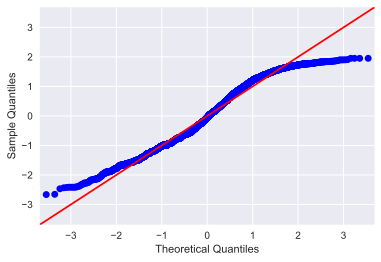

(0.071929966787052102, 8.8645406520360009e-70)


In [35]:
#We made the following assumptions:
#The samples are drawn randomly from the large population
#The means of the different drawn samples are normally distributed; 
#The confidence intervals are valid because: we belive the samples are drawn randomly 
#from the population, and with n being large enough (n=658), for the continous variable
#we think that according to central limit theorem. For the binary variable, with n 
#being big enough, we think a normal distribution approximates that of a 
#binomial distribution. 
#(d)to test normality QQ plot and K-S test 
fig = sm.graphics.qqplot(df['RPY_3YR_RT_SUPP'], sp.stats.norm, fit=True, line='45')
plt.show()
## test normality
print(sms.diagnostic.kstest_normal(df['RPY_3YR_RT_SUPP']))
#we have to reject the hypothesis that the continous outcome variable comes
#from a normal distribution

In [44]:
1.35810/math.sqrt(6242)

0.0171897621315811

In [36]:
#(e) Categorize instituition as public and private 
df['CONTROL'] = df['CONTROL'].apply(lambda x:0 if x==1 else 1)

In [37]:
means = df.groupby('CONTROL').agg({"RPY_3YR_RT_SUPP":"mean"})
print(means)
print('Difference of average 3 year repayment rate is:',means.values[0]-means.values[1])

         RPY_3YR_RT_SUPP
CONTROL                 
0               0.663881
1               0.575491
Difference of average 3 year repayment rate is: [ 0.08838926]


In [54]:
cm = sms.CompareMeans(
    sms.DescrStatsW(df.RPY_3YR_RT_SUPP[df.CONTROL==0]),
    sms.DescrStatsW(df.RPY_3YR_RT_SUPP[df.CONTROL==1])
)
cm.tconfint_diff(usevar='unequal',alpha=0.05)

(0.077460323181349308, 0.099318189150387828)

mean delta is -0.0883892561659
shuffled delta is 0.0150369163014


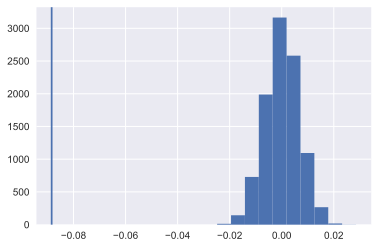

In [39]:
y = np.array(df.RPY_3YR_RT_SUPP)
t = np.array(df.CONTROL).astype('bool')
delta = y.dot(t)/t.sum() - y.dot(~t)/(~t).sum()
print("mean delta is",delta)
np.random.shuffle(t)
print("shuffled delta is",y.dot(t)/t.sum() - y.dot(~t)/(~t).sum())
B = 10000
permutations = np.zeros(B)
for i in range(B):
    np.random.shuffle(t)
    permutations[i] = y.dot(t)/t.sum() - y.dot(~t)/(~t).sum()
    
plt.hist(permutations)
plt.axvline(x=delta)
plt.show()

In [40]:
print('permutation pval =',(1.+(np.abs(permutations)>=np.abs(delta)).sum())/(B+1.))

permutation pval = 9.99900009999e-05


In [41]:
#(f)
import statsmodels.formula.api as smf
smf.ols('RPY_3YR_RT_SUPP ~CONTROL', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RPY_3YR_RT_SUPP   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     186.4
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           1.05e-41
Time:                        18:59:11   Log-Likelihood:                 911.93
No. Observations:                5044   AIC:                            -1820.
Df Residuals:                    5042   BIC:                            -1807.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6639      0.006    119.321      0.000       0.653       0.675
CONTROL       -0.0884      0.006    -13.654      0.000      -0.101      -0.076
==============================================================================
Omnibus:                      708.369   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.194
Skew:                           0.162   Prob(JB):                     1.84e-42
Kurtosis:                       2.100   Cond. No.                         3.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
smf.ols('RPY_3YR_RT_SUPP ~ ' + total, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RPY_3YR_RT_SUPP   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     488.1
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:21:04   Log-Likelihood:                 3205.9
No. Observations:                4309   AIC:                            -6372.
Df Residuals:                    4289   BIC:                            -6244.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6036      0.022     28.072      0.000       0.561       0.646
PREDDEG                0.0612      0.004     16.779      0.000       0.054       0.068
CONTROL               -0.0145      0.006     -2.295      0.022      -0.027      -0.002
LOCALE                 0.0001      0.000      0.473      0.637      -0.000       0.001
DISTANCEONLY           0.0299      0.029      1.014      0.311      -0.028       0.088
UGDS               -9.899e-07   4.23e-07     -2.339      0.019   -1.82e-06    -1.6e-07
UGDS_WHITE             0.1635      0.017      9.415      0.000       0.129       0.197
UGDS_BLACK            -0.0707      0.018     -3.835      0.000      -0.107      -0.035
UGDS_HISP              0.0863      0.019      4.484      0.000       0.049       0.124
UGDS_ASIAN             0.6393      0.042     15.211      0.000       0.557       0.722
UGDS_AIAN             -0.1415      0.059     -2.407      0.016      -0.257      -0.026
UGDS_NHPI             -0.4022      0.115     -3.505      0.000      -0.627      -0.177
UGDS_2MOR              0.0928      0.069      1.339      0.180      -0.043       0.229
UGDS_NRA               0.4126      0.066      6.254      0.000       0.283       0.542
PPTUG_EF               0.0006      0.009      0.060      0.952      -0.018       0.019
PCTPELL               -0.5124      0.015    -33.179      0.000      -0.543      -0.482
PCTFLOAN               0.3013      0.014     21.971      0.000       0.274       0.328
UG25abv               -0.1459      0.011    -13.225      0.000      -0.167      -0.124
GRAD_DEBT_MDN_SUPP -3.914e-06   3.72e-07    -10.525      0.000   -4.64e-06   -3.18e-06
NET_COST            4.601e-08   3.62e-07      0.127      0.899   -6.64e-07    7.56e-07
==============================================================================
Omnibus:                      102.328   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.474
Skew:                           0.105   Prob(JB):                     5.97e-48
Kurtosis:                       4.080   Cond. No.                     1.71e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""